## Bike Price **Prediction**

# Import Libraries

In [1]:

import pandas as pd

import numpy as np

# Import CSV File

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Lorddhaval/Dataset/patch-1/Bike%20Prices.csv')


In [3]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859


In [4]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,625.000000,625.000000,625.000000,625.000000
mean,58340.276800,2014.803200,32704.651200,86054.648000
std,53186.944553,3.020441,45508.553232,61173.244185
min,6000.000000,2001.000000,380.000000,30490.000000
25%,30000.000000,2013.000000,13125.000000,54852.000000
50%,45000.000000,2015.000000,25000.000000,72532.000000
75%,65000.000000,2017.000000,40000.000000,87000.000000
max,760000.000000,2020.000000,585659.000000,752020.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              625 non-null    object
 1   Model              625 non-null    object
 2   Selling_Price      625 non-null    int64 
 3   Year               625 non-null    int64 
 4   Seller_Type        625 non-null    object
 5   Owner              625 non-null    object
 6   KM_Driven          625 non-null    int64 
 7   Ex_Showroom_Price  625 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 39.2+ KB


In [6]:
df[['Brand']].value_counts()

,count
Brand,
Honda,170
Bajaj,143
Hero,108
Yamaha,94
Royal,40
TVS,23
Suzuki,18
KTM,6
Mahindra,6


In [7]:
df[['Model']].value_counts()


,count
Model,
Honda Activa [2000-2015],23
Honda CB Hornet 160R,22
Bajaj Pulsar 180,20
Bajaj Discover 125,16
Yamaha FZ S V 2.0,16
...,...
Royal Enfield Continental GT [2013 - 2018],1
Royal Enfield Classic Stealth Black,1
Royal Enfield Classic Squadron Blue,1


In [8]:
df[['Seller_Type']].value_counts()

,count
Seller_Type,
Individual,622
Dealer,3


In [9]:
df[['Owner']].value_counts()

,count
Owner,
1st owner,556
2nd owner,65
3rd owner,3
4th owner,1


In [10]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [11]:
df.shape

(625, 8)

In [12]:
df.replace({'Seller_Type':{'Individual':0, 'Dealer':1}},inplace=True)

In [13]:
df.replace({'Owner':{'1st owner':0, '2nd owner' :1, '3rd owner':2, '4th owner':3}},inplace=True)


# X = Dependent Variable Y = Independent Variable

In [14]:
y = df['Selling_Price']

In [15]:
y.shape

(625,)

In [16]:
y

,Selling_Price
0,30000
1,18000
2,20000
3,25000
4,24999
...,...
620,300000
621,330000
622,300000
623,425000


In [17]:
X = df[['Year', 'Seller_Type', 'Owner' ,'KM_Driven','Ex_Showroom_Price']]

In [18]:
X.shape

(625, 5)

In [19]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490
1,2017,0,0,35000,32000
2,2011,0,0,10000,37675
3,2010,0,0,43000,42859
4,2012,0,1,35000,42859
...,...,...,...,...,...
620,2016,0,0,9800,360000
621,2014,0,3,6500,534000
622,2011,0,0,12000,589000
623,2017,0,1,13600,599000


In [20]:
df.isnull().sum()

,0
Brand,0
Model,0
Selling_Price,0
Year,0
Seller_Type,0
Owner,0
KM_Driven,0
Ex_Showroom_Price,0


# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=222529)


In [23]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((437, 5), (188, 5), (437,), (188,))

# Training Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
LinearRegression()

LinearRegression()

# Model Prediction

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred.shape

(188,)

In [30]:
y_pred

array([ 31759.32474383,  55237.0527462 ,  60121.03586234,  30803.18577459,
        53237.76993016, 108635.64688662,  34630.69688213,  50827.86201479,
        53708.62467875,  60942.38885849,  66293.4201599 ,  35174.51944079,
        27826.51406498,  37096.75105985, 217395.29408863, 108594.63042174,
        50066.33785158,  81313.93838599, 142903.56624849,   4100.34180872,
       122830.55392247,  35274.78191048,  39538.13632234,  50050.81338781,
       162983.77523041,  29269.22842947,  94944.90356803, 106158.04967606,
        49577.20798692, 125708.50476881,  61472.10323635,  78676.98557533,
       142237.10124743,  51945.53945346,  47393.61800112,  21859.84796742,
        41022.10132048,  39674.85787192,  -4712.43036749,  21997.9643948 ,
        55037.53488095, 146589.57684366,  31161.0699252 ,  60137.17204345,
        49636.25737639,  79316.18985605,  73179.72040916, 145826.47822095,
        78743.89223444,  24872.56849915,  23999.97424239, 168031.14691099,
       105251.62085873, 1

# Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [32]:
mean_squared_error(y_test,y_pred)

357601048.3022558

In [33]:
mean_absolute_error(y_test,y_pred)

11805.735959429532

In [34]:
r2_score(y_test,y_pred)

0.8332147278404498

# Visualization of Actual Vs Predicted Results

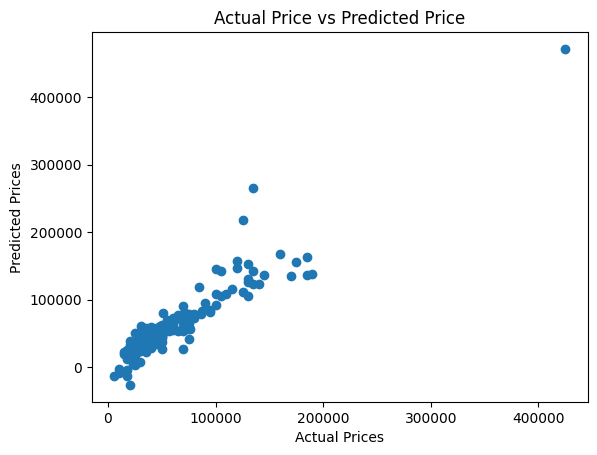

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Future Predictions

In [36]:
df_new = df.sample(1)

In [37]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
68,Honda,Honda Activa [2000-2015],25000,2007,0,0,17860,50267


In [38]:
df_new.shape

(1, 8)

In [39]:
X_new = df_new.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [40]:
y_pred_new = lr.predict(X_new)

In [41]:
y_pred_new

array([-3492.5079549])